In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

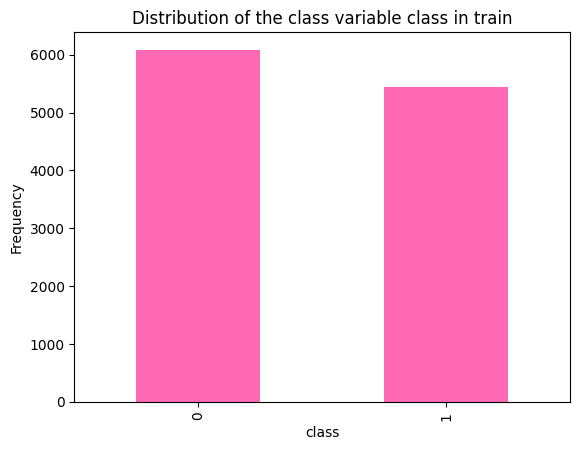

In [3]:
train = pd.read_csv('data/pcl_df_train_train_aug.csv')
test = pd.read_csv('data/pcl_df_dev_processed.csv')
# plot the distribution of the target variable class in train
train['class'].value_counts().plot(kind='bar', color = 'hotpink')
plt.title('Distribution of the class variable class in train')
plt.xlabel('class')
plt.ylabel('Frequency')
plt.show()

Results for Naive Bayes
Accuracy: 0.8786430960344004
F1 score: 0.29444444444444445


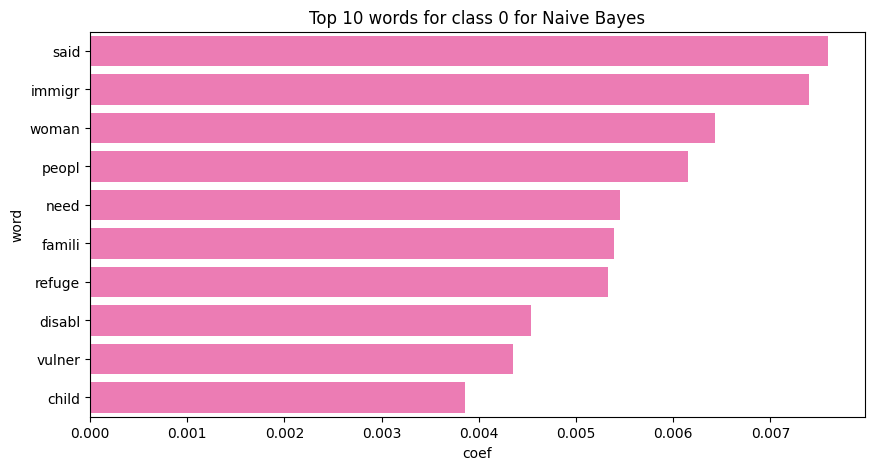

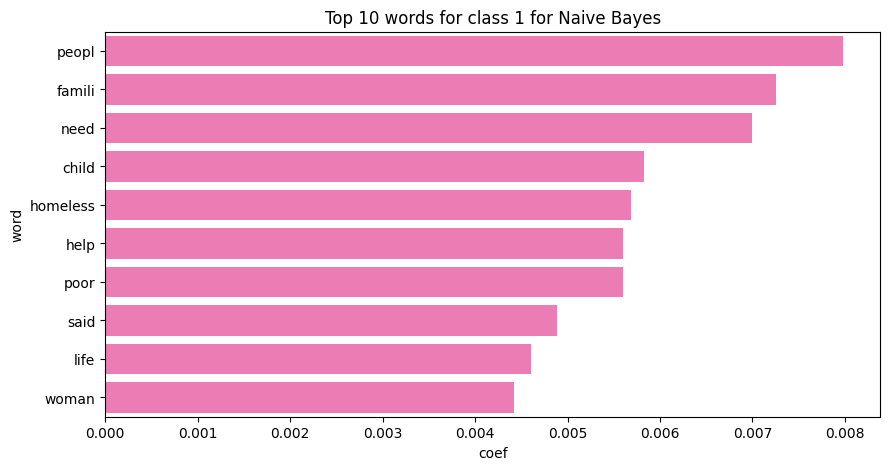

Results for Logistic Regression
Accuracy: 0.8490205446727186
F1 score: 0.3130434782608696


,0
00en,0.025938
00ur,0.053564
03etegd,0.004519
03opl,0.049541
04otedt,0.019714
...,...
zyivfaj,0.011274
zyngier,-0.002621
zytent,0.108799
zzsishant,0.270566


In [18]:
# Trying Baseline classifiers using BoW

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
import numpy as np
import seaborn as sns


X_train = train['text']
y_train = train['class']

X_test = test['text']
y_test = test['class']

# Create a Bag of Words model
vectorizer = CountVectorizer(stop_words='english')
train_features = vectorizer.fit_transform(X_train)
test_features = vectorizer.transform(X_test)

# Train a Naive Bayes classifier
NB = MultinomialNB()
NB.fit(train_features, y_train)

# Make predictions on the test set
predictions = NB.predict(test_features)

# Print the accuracy score
print('Results for Naive Bayes')
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 score:', f1_score(y_test, predictions))
# Extract the probabilities of the classifier
probs = NB.predict_proba(test_features)
probs_df = pd.DataFrame(probs, columns = NB.classes_)
probs_df['label'] = y_test 
probs_df['prediction'] = predictions
probs_df['text'] = X_test
probs_df['misclassified'] = probs_df.apply(lambda x: 1 if x['label'] != x['prediction'] else 0, axis=1)
probs_df.to_csv('probs_niave_bayes_df.csv', index=False)

# consider the conditional probabilities learnt by the model to see which words are the most influential for each class
# # Extract the coefficients to get the words that are most influential for each class and plot 
coef = NB.feature_log_prob_
coef_df = pd.DataFrame(coef, columns = vectorizer.get_feature_names_out())
coef_df['class'] = [0, 1]
coef_df = coef_df.melt(id_vars=['class'], var_name='word', value_name='coef')
coef_df['coef'] = np.exp(coef_df['coef'])
# coef_df = coef_df.sort_values(by=['class', 'coef'], ascending=False)

# Plot the top 10 words for each class
# top 10 words for class 0, sort the values by class and coefficient for class 0 and plot the top 10 words

coef_df[coef_df['class'] == 0].sort_values(by='coef', ascending=False).head(10)
# plot top 10 in a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='coef', y='word', data=coef_df[coef_df['class'] == 0].sort_values(by='coef', ascending=False).head(10), color='hotpink')
plt.title('Top 10 words for class 0 for Naive Bayes')
plt.show()

# same for class 1
coef_df[coef_df['class'] == 1].sort_values(by='coef', ascending=False).head(10)
# plot top 10 in a bar chart
plt.figure(figsize=(10, 5))
sns.barplot(x='coef', y='word', data=coef_df[coef_df['class'] == 1].sort_values(by='coef', ascending=False).head(10), color='hotpink')
plt.title('Top 10 words for class 1 for Naive Bayes')
plt.show()


# # Try SVM classifier

# from sklearn.svm import LinearSVC

# # Train a SVM classifier
# clf = LinearSVC()
# clf.fit(train_features, y_train)

# # Make predictions on the test set
# predictions = clf.predict(test_features)

# # Print the accuracy score
# print('Accuracy:', accuracy_score(y_test, predictions))
# print('F1 score:', f1_score(y_test, predictions))


# Train a Logistic Regression classifier
clf = LogisticRegression()
clf.fit(train_features, y_train)

# Make predictions on the test set
predictions = clf.predict(test_features)


# Print the accuracy score
print('Results for Logistic Regression')
print('Accuracy:', accuracy_score(y_test, predictions))
print('F1 score:', f1_score(y_test, predictions))

# look at the learned weights in the logistic regression model and plot the top 10 words which are most influential for each class
# Extract the coefficients to get the words that are most influential for each class and plot
coef = clf.coef_
coef_df = pd.DataFrame(coef, columns = vectorizer.get_feature_names_out())
# transpose the dataframe
coef_df = coef_df.T
# call the columne "coef"
coef_df.columns = ['coef'] 
coef_df



In [23]:

coef_df

,coef,word
00en,0.025938,00en
00ur,0.053564,00ur
03etegd,0.004519,03etegd
03opl,0.049541,03opl
04otedt,0.019714,04otedt
...,...,...
zyivfaj,0.011274,zyivfaj
zyngier,-0.002621,zyngier
zytent,0.108799,zytent
zzsishant,0.270566,zzsishant


In [26]:
# sort coef_df by the absolute value of the coefficient
# get absolute value of the coefficient
coef_df['coef'] = coef_df['coef'].apply(lambda x: abs(x))
coef_df = coef_df.sort_values(by='coef', ascending=False) 

In [27]:
coef_df 

,coef,word
christma,2.537435,christma
hopelessli,2.403348,hopelessli
dreamer,2.259073,dreamer
thi,2.240465,thi
hungri,2.066894,hungri
...,...,...
nonloc,0.000010,nonloc
postul,0.000010,postul
zoom,0.000010,zoom
yongchak,0.000010,yongchak
